In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

Using TensorFlow backend.


In [2]:
def findUniqueVehicleIdInDataFrame(dataframe):
    uniqueVehicleId = []
    for idx, row in dataframe.loc[:].iterrows():
        if row['VehicleId'] not in uniqueVehicleId:
            uniqueVehicleId.append(row['VehicleId'])

    return uniqueVehicleId

In [3]:
dataframe = pd.read_csv('data.csv')
print("Number of rows and columns:", dataframe.shape)

uniqueVehicleId = findUniqueVehicleIdInDataFrame(dataframe)

Number of rows and columns: (158606, 10)


In [4]:
frames = []
for vehicleId in uniqueVehicleId:
    temporaryDataframe = str(vehicleId)
    temporaryDataframe = dataframe.loc[dataframe['VehicleId'] == vehicleId]
    frames.append(temporaryDataframe)
df = pd.concat(frames)

In [5]:
df.head(5)

,TimeStamp,DistanceToStopBar,VehicleId,VehicleType,Speed,Heading,LocationOnMap,LaneId,ApproachId,SignalGroup
0,1623199945,345,68,Car,11.18,90.14,inbound,14,5,2
1,1623199945,344,68,Car,11.20,90.14,inbound,14,5,2
2,1623199945,343,68,Car,11.21,90.14,inbound,14,5,2
3,1623199945,342,68,Car,11.23,90.14,inbound,14,5,2
4,1623199945,341,68,Car,11.24,90.14,inbound,14,5,2


In [6]:
df['VehicleType'] = df['VehicleType'].replace(['Transit'],6)
df['VehicleType'] = df['VehicleType'].replace(['Truck'],9)
df['VehicleType'] = df['VehicleType'].replace(['EmergencyVehicle'],2)
df['VehicleType'] = df['VehicleType'].replace(['Car'],4)
df.head(5)

,TimeStamp,DistanceToStopBar,VehicleId,VehicleType,Speed,Heading,LocationOnMap,LaneId,ApproachId,SignalGroup
0,1623199945,345,68,4,11.18,90.14,inbound,14,5,2
1,1623199945,344,68,4,11.20,90.14,inbound,14,5,2
2,1623199945,343,68,4,11.21,90.14,inbound,14,5,2
3,1623199945,342,68,4,11.23,90.14,inbound,14,5,2
4,1623199945,341,68,4,11.24,90.14,inbound,14,5,2


In [7]:
df['LocationOnMap'] = df['LocationOnMap'].replace(['inbound'],2)
df['LocationOnMap'] = df['LocationOnMap'].replace(['outbound'],4)
df['LocationOnMap'] = df['LocationOnMap'].replace(['outBound'],4)
df['LocationOnMap'] = df['LocationOnMap'].replace(['insideIntersectionBox'],1)

df.head(5)

,TimeStamp,DistanceToStopBar,VehicleId,VehicleType,Speed,Heading,LocationOnMap,LaneId,ApproachId,SignalGroup
0,1623199945,345,68,4,11.18,90.14,2,14,5,2
1,1623199945,344,68,4,11.20,90.14,2,14,5,2
2,1623199945,343,68,4,11.21,90.14,2,14,5,2
3,1623199945,342,68,4,11.23,90.14,2,14,5,2
4,1623199945,341,68,4,11.24,90.14,2,14,5,2


In [8]:
#cols = list(df)[1:10]
#cols

In [9]:
#df_for_training = df[cols].astype(float)
#df_for_training.head(5)

In [10]:
tranining_setsize = int(df.shape[0]*0.8)
print(tranining_setsize)

126884


In [11]:
df_for_training = df.iloc[:tranining_setsize, 1:10]
df_for_testing = df.iloc[tranining_setsize:, 1:10]

In [12]:
df_for_training.head()

,DistanceToStopBar,VehicleId,VehicleType,Speed,Heading,LocationOnMap,LaneId,ApproachId,SignalGroup
0,345,68,4,11.18,90.14,2,14,5,2
1,344,68,4,11.20,90.14,2,14,5,2
2,343,68,4,11.21,90.14,2,14,5,2
3,342,68,4,11.23,90.14,2,14,5,2
4,341,68,4,11.24,90.14,2,14,5,2


In [13]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
#normalize the dataset
# scaler = StandardScaler()
# scaler = scaler.fit(df_for_training)
# df_for_training_scaled = scaler.transform(df_for_training)

In [14]:
trainX = []
trainY = []

In [15]:
n_future = 1 #Number of days we want to predict into the future
n_past = 50 #Number of past days we want to use to predict the future

In [16]:
uniqueVehicleId = findUniqueVehicleIdInDataFrame(df_for_training)

In [17]:
for vehicleId in uniqueVehicleId:
    #x = len(df[df['VehicleId'] ==  vehicleId])

    temporaryDataframe = str(vehicleId)
    temporaryDataframe = df_for_training.loc[df_for_training['VehicleId'] == vehicleId]
#     scaler = scaler.fit(temporaryDataframe)
#     temporaryDataframe_scaled = scaler.transform(temporaryDataframe)
#     print( temporaryDataframe_scaled)
    
    sc = MinMaxScaler(feature_range = (0, 1))
    temporaryDataframe_scaled = sc.fit_transform(temporaryDataframe)

    for i in range (n_past, len(temporaryDataframe_scaled) - n_future + 1):
        trainX.append(temporaryDataframe_scaled[i - n_past:i, 0:temporaryDataframe_scaled.shape[1]])
        trainY.append(temporaryDataframe_scaled[i + n_future -1:i +n_future, 0])


In [18]:
trainY

[array([0.44637681]),
 array([0.44347826]),
 array([0.44057971]),
 array([0.43768116]),
 array([0.43478261]),
 array([0.42898551]),
 array([0.42608696]),
 array([0.42318841]),
 array([0.42028986]),
 array([0.4173913]),
 array([0.41449275]),
 array([0.4115942]),
 array([0.40869565]),
 array([0.40289855]),
 array([0.4]),
 array([0.39710145]),
 array([0.3942029]),
 array([0.39130435]),
 array([0.3884058]),
 array([0.38550725]),
 array([0.3826087]),
 array([0.37971014]),
 array([0.37391304]),
 array([0.37101449]),
 array([0.36811594]),
 array([0.36521739]),
 array([0.36231884]),
 array([0.35942029]),
 array([0.35652174]),
 array([0.35072464]),
 array([0.34782609]),
 array([0.34492754]),
 array([0.34202899]),
 array([0.33913043]),
 array([0.33623188]),
 array([0.33333333]),
 array([0.33043478]),
 array([0.32463768]),
 array([0.32173913]),
 array([0.31884058]),
 array([0.31594203]),
 array([0.31304348]),
 array([0.31014493]),
 array([0.30724638]),
 array([0.30434783]),
 array([0.29855072]),


In [19]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [20]:
trainY

array([[0.44637681],
       [0.44347826],
       [0.44057971],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [21]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (115384, 50, 9).
trainY shape == (115384, 1).


In [22]:
# model = Sequential()
# model.add(LSTM(64, activation = 'relu', input_shape =(trainX.shape[1],trainX.shape[2]), return_sequences = True))
# model.add(LSTM(32, activation = 'relu', return_sequences = False))
# model.add(Dropout(0.2))
# # Adding the output layer
# model.add(Dense(trainY.shape[1]))

# model.compile(optimizer = 'adam', loss = 'mse')
# model.summary()
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            12000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

In [23]:
# Fitting the RNN to the Training set
model.fit(trainX, trainY, epochs = 2, batch_size = 32)

Epoch 1/2
115384/115384 [==============================] - 229s 2ms/step - loss: 0.0012
Epoch 2/2
115384/115384 [==============================] - 233s 2ms/step - loss: 5.9873e-04


In [24]:
uniqueVehicleId = findUniqueVehicleIdInDataFrame(df_for_testing)
testX = []
testY = []
tempX =[]
tempY = []

In [25]:
for vehicleId in uniqueVehicleId:
    temporaryDataframe = str(vehicleId)
    temporaryDataframe = df_for_testing.loc[df_for_testing['VehicleId'] == vehicleId]
    tempDataframe = np.array(temporaryDataframe.values)
#     print("tempDataframe is following:\n",tempDataframe)
#     scaler = scaler.fit(temporaryDataframe)
#     temporaryDataframe_scaled = scaler.transform(temporaryDataframe)
    sc = MinMaxScaler(feature_range = (0, 1))
    temporaryDataframe_scaled = sc.fit_transform(temporaryDataframe)
#     print("\n temporaryDataframe_scaled is following:\n",temporaryDataframe_scaled)
    for i in range (n_past, len(temporaryDataframe_scaled) - n_future + 1):
        testX.append(temporaryDataframe_scaled[i - n_past:i, 0:temporaryDataframe_scaled.shape[1]])
        testY.append(temporaryDataframe_scaled[i + n_future -1:i +n_future, 0])
    
    for i in range (n_past, len(tempDataframe) - n_future + 1):
        tempX.append(tempDataframe[i - n_past:i, 0:tempDataframe.shape[1]])
        tempY.append(tempDataframe[i + n_future -1:i +n_future, 0])
    

In [26]:
testX = np.array(testX)
testY =  np.array(testY)
# print(testX)

In [27]:
tempX = np.array(tempX)
tempY =  np.array(tempY)

In [28]:
print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

print('tempX shape == {}.'.format(tempX.shape))
print('tempY shape == {}.'.format(tempY.shape))

testX shape == (28722, 50, 9).
testY shape == (28722, 1).
tempX shape == (28722, 50, 9).
tempY shape == (28722, 1).


In [29]:
predictedValue = model.predict(testX)

In [30]:
predictedValue

array([[0.13872586],
       [0.1348721 ],
       [0.13086505],
       ...,
       [0.07509488],
       [0.07850655],
       [0.08177738]], dtype=float32)

In [31]:
forecast_copies = np.repeat(predictedValue, df_for_training.shape[1], axis = -1)
predicted = sc.inverse_transform(forecast_copies)[:,0]

In [32]:
predicted.size

28722

In [33]:
#Forecasting
train_dates = df['TimeStamp']
n_future = 10

forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()
forecast = model.predict(trainX[-n_future:])
#We have 5 variables for transform, the inverse expects same dimensions
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis = -1)
# y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]
y_pred_future = sc.inverse_transform(forecast_copies)[:,0]

In [34]:
y_pred_future

array([4.132268, 4.132268, 4.132268, 4.132268, 4.132268, 4.132268,
       4.132268, 4.132268, 4.132268, 4.132268], dtype=float32)

In [35]:
df_for_testing = df.iloc[tranining_setsize:, 1:10]
print(tranining_setsize)
print(df_for_testing.shape[0])
print(df_for_testing['DistanceToStopBar'].tolist())

126884
31722
[26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 23, 23, 23, 22, 22, 21, 21, 20, 20, 19, 19, 18, 17, 17, 16, 15, 15, 14, 13, 12, 11, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 46, 47, 48, 49, 50, 52, 53, 54, 55, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 88, 89, 90, 91, 93, 94, 95, 96, 98, 99, 100, 101, 103, 104, 105, 106, 108, 109, 110, 111, 113, 114, 115, 116, 118, 119, 120, 121, 123, 124, 125, 126, 128, 129, 130, 131, 133, 134, 135, 136, 137, 139, 140, 141, 345, 344, 343, 342, 340, 339, 338, 337, 336, 334, 333, 332, 331, 330, 329, 327, 326, 325, 324, 323, 321, 320, 319, 318, 317, 315, 314, 313, 312, 311, 193, 

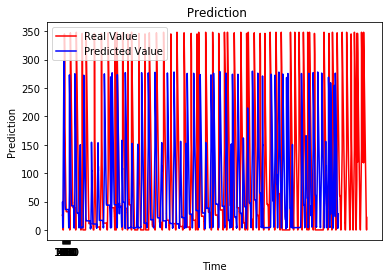

In [36]:
# Visualising the results
plt.plot(np.arange(0,df_for_testing.shape[0]) ,df_for_testing['DistanceToStopBar'].tolist(), color = 'red', label = 'Real Value')
plt.plot(np.arange(0,predicted.size), predicted, color = 'blue', label = 'Predicted Value')
plt.xticks(np.arange(0,800,50))
plt.title(' Prediction')
plt.xlabel('Time')
plt.ylabel('Prediction')
plt.legend()
plt.show()

In [37]:
# # testY = df.iloc[tranining_setsize:, 1:2].values
# pastX =np.array([[[348, 810,4,11.92,90.14,2,13,5,2],
# [347,810,4,11.9,90.14,2,13,5,2],
# [346,810,4,11.87,90.14,2,13,5,2],
# [345,810,4,11.84,90.14,2,13,5,2],
# [343,810,4,11.82,90.14,2,13,5,2],
# [342,810,4,11.79,90.14,2,13,5,2],
# [341,810,4,11.77,90.14,2,13,5,2],
# [340,810,4,11.74,90.14,2,13,5,2],
# [339,810,4,11.71,90.14,2,13,5,2],
# [338,810,4,11.69,90.14,2,13,5,2],
# [336,810,4,11.66,90.14,2,13,5,2],
# [335,810,4,11.63,90.14,2,13,5,2],
# [334,810,4,11.61,90.14,2,13,5,2],
# [333,810,4,11.58,90.14,2,13,5,2],
# [332,810,4,11.56,90.14,2,13,5,2],
# [331,810,4,11.53,90.14,2,13,5,2],
# [329,810,4,11.5,90.14,2,13,5,2],
# [328,810,4,11.48,90.14,2,13,5,2],
# [327,810,4,11.47,90.14,2,13,5,2],
# [326,810,4,11.48,90.14,2,13,5,2]]])

# pastY = np.array([np.array([348]),np.array([347]),np.array([346]),np.array([345]),np.array([343]),np.array([342]),
#                   np.array([341]),np.array([340]),np.array([339]),np.array([338]),np.array([336]),np.array([335]),
#                  np.array([334]),np.array([333]),np.array([332]),np.array([331]),np.array([329]),np.array([328]),
#                  np.array([327]),np.array([326])])
# print('pastX shape == {}.'.format(pastX.shape))
# print('pastY shape == {}.'.format(pastY.shape))

In [38]:
# predictedFuture = model.predict(pastX)

# forecast_copies = np.repeat(predictedFuture, df_for_training.shape[1], axis = -1)
# predictedFuture = sc.inverse_transform(forecast_copies)[:,0]

In [39]:
# predictedFuture

In [40]:
# pastY = [348, 347, 346, 345, 343, 342, 341, 340, 339, 338, 336, 335, 334, 333, 332, 331, 329, 328, 327, 326]
futureY = 327

In [41]:
# from math import sqrt
# from sklearn.metrics import mean_squared_error
# rmse = sqrt(mean_squared_error(np.array(futureY), predictedFuture))

# print('Test RMSE: %.3f' % rmse)

# from sklearn.metrics import accuracy_score
# print('The prediction accuracy is:', accuracy_score(np.array(futureY), predictedFuture))

In [42]:
tempPredictedFuture = model.predict(tempX)
# print('The prediction accuracy is:', accuracy_score(tempY, pastY))

In [43]:
tempY

array([[17.],
       [16.],
       [15.],
       ...,
       [19.],
       [20.],
       [22.]])

In [44]:
tempPredictedFuture

array([[0.7148235 ],
       [0.7148235 ],
       [0.7148235 ],
       ...,
       [0.5346843 ],
       [0.50201774],
       [0.4754394 ]], dtype=float32)

In [45]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(tempPredictedFuture, tempY))
print('Test RMSE: %.3f' % rmse)
# print('The prediction accuracy is:', accuracy_score(tempY, tempPredictedFuture))

Test RMSE: 102.579
